In [ ]:
import fastf1
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import fastf1.plotting
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
from matplotlib.collections import LineCollection



In [ ]:
class FastFormulaOne:
    def __init__(self, year, event, session_type):
        self.session = fastf1.get_session(year, event, session_type)
        self.year = year
        self.laps = self.session.load
        self.session.load()

    def get_schedule(self):
        return fastf1.get_event_schedule(self.year)

    def plot_driver_positions(self, figsize=(8.0, 4.9)):
        fig, ax = plt.subplots(figsize=figsize)

        for drv in self.session.drivers:
            drv_laps = self.session.laps.pick_drivers(drv)
            if drv_laps.empty:
                continue

            abb = drv_laps['Driver'].iloc[0]
            style = fastf1.plotting.get_driver_style(identifier=abb,
                                                     style=['color', 'linestyle'],
                                                     session=self.session)

            ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
                    label=abb, **style)

        ax.set_ylim([20.5, 0.5])
        ax.set_yticks([1, 5, 10, 15, 20])
        ax.set_xlabel('Lap')
        ax.set_ylabel('Position')
        ax.legend(bbox_to_anchor=(1.0, 1.02))
        plt.tight_layout()
        plt.show()

    def top_5_f1_drivers(self):
        top5_ff1_results= self.session.results.sort_values(by='Points', ascending=False)['FullName'].head(5)
        return top5_ff1_results

    def plot_driver_telemetry(self, driver, colormap=mpl.cm.plasma):
        weekend = self.session.event
        lap = self.session.laps.pick_drivers(driver).pick_fastest()

        x = lap.telemetry['X']
        y = lap.telemetry['Y']
        color = lap.telemetry['Speed']

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
        fig.suptitle(f'{weekend.name} {self.year} - {driver} - Speed', size=24, y=0.97)

        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
        ax.axis('off')

        ax.plot(x, y, color='black', linestyle='-', linewidth=16, zorder=0)

        norm = plt.Normalize(color.min(), color.max())
        lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)
        lc.set_array(color)
        ax.add_collection(lc)

        cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
        normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
        mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")
        plt.show()

    
    def fastest_laps(self):
            laps = self.session.laps
            fastest_laps = laps.pick_fastest() 
            return fastest_laps
          
    def top_team_name(self):
        return self.session.results.sort_values(by='Points', ascending=False)['TeamName'].head(1)
        
        


In [ ]:
f1 = FastFormulaOne(2023,'Monza','R')
f2 = FastFormulaOne(2023,'Aus','R')


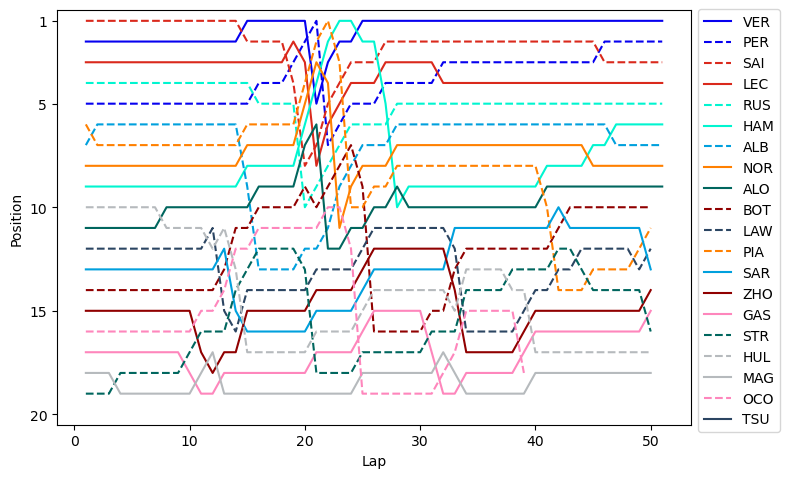

In [81]:
f1.plot_driver_positions()

In [ ]:
f1.session.results

In [ ]:
f2.session.results

In [ ]:
f1.session.laps

In [29]:
f1.get_schedule()

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25,Pre-Season Testing,testing,Practice 1,2023-02-23 10:00:00+03:00,2023-02-23 07:00:00,...,Practice 3,2023-02-25 10:00:00+03:00,2023-02-25 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 14:30:00+03:00,2023-03-03 11:30:00,...,Practice 3,2023-03-04 14:30:00+03:00,2023-03-04 11:30:00,Qualifying,2023-03-04 18:00:00+03:00,2023-03-04 15:00:00,Race,2023-03-05 18:00:00+03:00,2023-03-05 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 16:30:00+03:00,2023-03-17 13:30:00,...,Practice 3,2023-03-18 16:30:00+03:00,2023-03-18 13:30:00,Qualifying,2023-03-18 20:00:00+03:00,2023-03-18 17:00:00,Race,2023-03-19 20:00:00+03:00,2023-03-19 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02,Australian Grand Prix,conventional,Practice 1,2023-03-31 12:30:00+10:00,2023-03-31 02:30:00,...,Practice 3,2023-04-01 12:30:00+10:00,2023-04-01 02:30:00,Qualifying,2023-04-01 16:00:00+10:00,2023-04-01 06:00:00,Race,2023-04-02 15:00:00+10:00,2023-04-02 05:00:00,True
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30,Azerbaijan Grand Prix,sprint_shootout,Practice 1,2023-04-28 13:30:00+04:00,2023-04-28 09:30:00,...,Sprint Shootout,2023-04-29 12:30:00+04:00,2023-04-29 08:30:00,Sprint,2023-04-29 17:30:00+04:00,2023-04-29 13:30:00,Race,2023-04-30 15:00:00+04:00,2023-04-30 11:00:00,True
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07,Miami Grand Prix,conventional,Practice 1,2023-05-05 14:00:00-04:00,2023-05-05 18:00:00,...,Practice 3,2023-05-06 12:30:00-04:00,2023-05-06 16:30:00,Qualifying,2023-05-06 16:00:00-04:00,2023-05-06 20:00:00,Race,2023-05-07 15:30:00-04:00,2023-05-07 19:30:00,True
6,6,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28,Monaco Grand Prix,conventional,Practice 1,2023-05-26 13:30:00+02:00,2023-05-26 11:30:00,...,Practice 3,2023-05-27 12:30:00+02:00,2023-05-27 10:30:00,Qualifying,2023-05-27 16:00:00+02:00,2023-05-27 14:00:00,Race,2023-05-28 15:00:00+02:00,2023-05-28 13:00:00,True
7,7,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04,Spanish Grand Prix,conventional,Practice 1,2023-06-02 13:30:00+02:00,2023-06-02 11:30:00,...,Practice 3,2023-06-03 12:30:00+02:00,2023-06-03 10:30:00,Qualifying,2023-06-03 16:00:00+02:00,2023-06-03 14:00:00,Race,2023-06-04 15:00:00+02:00,2023-06-04 13:00:00,True
8,8,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18,Canadian Grand Prix,conventional,Practice 1,2023-06-16 13:30:00-04:00,2023-06-16 17:30:00,...,Practice 3,2023-06-17 12:30:00-04:00,2023-06-17 16:30:00,Qualifying,2023-06-17 16:00:00-04:00,2023-06-17 20:00:00,Race,2023-06-18 14:00:00-04:00,2023-06-18 18:00:00,True
9,9,Austria,Spielberg,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,2023-07-02,Austrian Grand Prix,sprint_shootout,Practice 1,2023-06-30 13:30:00+02:00,2023-06-30 11:30:00,...,Sprint Shootout,2023-07-01 12:00:00+02:00,2023-07-01 10:00:00,Sprint,2023-07-01 16:30:00+02:00,2023-07-01 14:30:00,Race,2023-07-02 15:00:00+02:00,2023-07-02 13:00:00,True


req            INFO 	Using cached data for driver_info


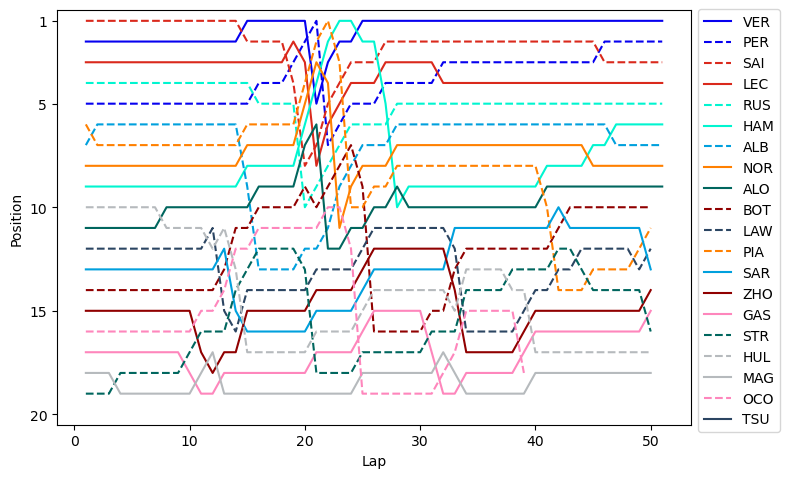

In [10]:
f1.plot_driver_positions()

In [78]:
f1.top_5_f1_drivers()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,1.0,1,2.0,NaT,NaT,NaT,0 days 01:13:41.143000,Finished,25.0,51.0
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,2.0,2,5.0,NaT,NaT,NaT,0 days 00:00:06.064000,Finished,18.0,51.0
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,3.0,3,1.0,NaT,NaT,NaT,0 days 00:00:11.193000,Finished,15.0,51.0
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,4.0,4,3.0,NaT,NaT,NaT,0 days 00:00:11.377000,Finished,12.0,51.0
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,5.0,5,4.0,NaT,NaT,NaT,0 days 00:00:23.028000,Finished,10.0,51.0


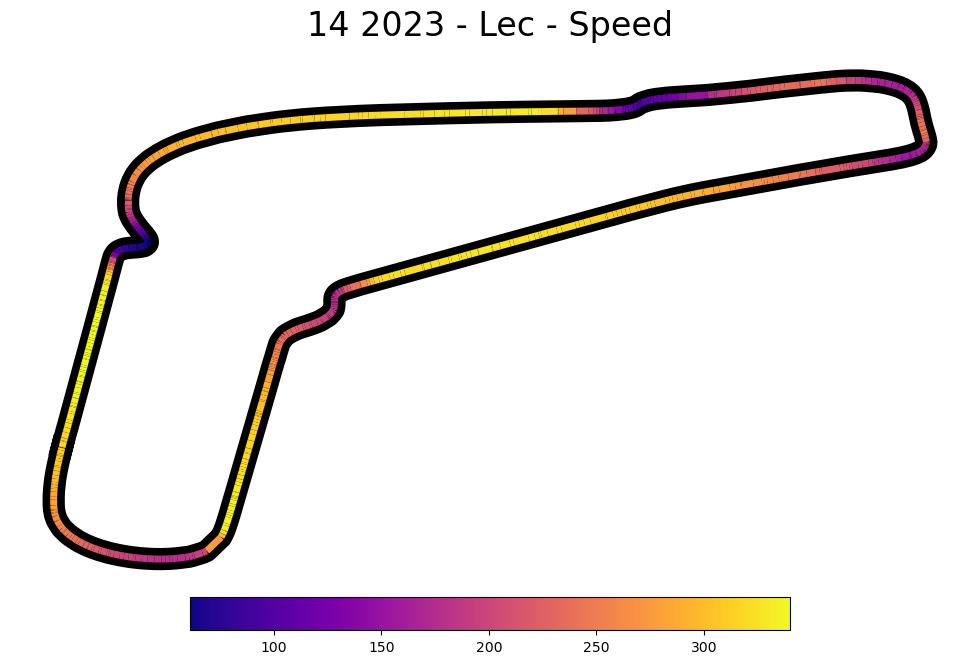

In [21]:
f1.plot_driver_telemetry('Lec')

In [12]:
f1.fastest_laps()[['Driver','LapTime']]

Driver                        PIA
LapTime    0 days 00:01:25.072000
dtype: object

In [51]:
f1.top_team_name()

1    Red Bull Racing
Name: TeamName, dtype: object

In [16]:
f1.laps()

AttributeError: 'FastFormulaOne' object has no attribute 'laps'

In [42]:
session= fastf1.get_session(2021,'Monaco','R')
session.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cac

In [43]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
33,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,0600EF,red_bull,Max,Verstappen,Max Verstappen,...,1.0,1,2.0,NaT,NaT,NaT,0 days 01:38:56.820000,Finished,25.0,78.0
55,55,C SAINZ,SAI,sainz,Ferrari,DC0004,ferrari,Carlos,Sainz,Carlos Sainz,...,2.0,2,4.0,NaT,NaT,NaT,0 days 00:00:08.968000,Finished,18.0,78.0
4,4,L NORRIS,NOR,norris,McLaren,FF9800,mclaren,Lando,Norris,Lando Norris,...,3.0,3,5.0,NaT,NaT,NaT,0 days 00:00:19.427000,Finished,15.0,78.0
11,11,S PEREZ,PER,perez,Red Bull Racing,0600EF,red_bull,Sergio,Perez,Sergio Perez,...,4.0,4,9.0,NaT,NaT,NaT,0 days 00:00:20.490000,Finished,12.0,78.0
5,5,S VETTEL,VET,vettel,Aston Martin,006F62,aston_martin,Sebastian,Vettel,Sebastian Vettel,...,5.0,5,8.0,NaT,NaT,NaT,0 days 00:00:52.591000,Finished,10.0,78.0
10,10,P GASLY,GAS,gasly,AlphaTauri,2B4562,alphatauri,Pierre,Gasly,Pierre Gasly,...,6.0,6,6.0,NaT,NaT,NaT,0 days 00:00:53.896000,Finished,8.0,78.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,7.0,7,7.0,NaT,NaT,NaT,0 days 00:01:08.231000,Finished,7.0,78.0
18,18,L STROLL,STR,stroll,Aston Martin,006F62,aston_martin,Lance,Stroll,Lance Stroll,...,8.0,8,13.0,NaT,NaT,NaT,NaT,+1 Lap,4.0,77.0
31,31,E OCON,OCO,ocon,Alpine,0090FF,alpine,Esteban,Ocon,Esteban Ocon,...,9.0,9,11.0,NaT,NaT,NaT,NaT,+1 Lap,2.0,77.0
99,99,A GIOVINAZZI,GIO,giovinazzi,Alfa Romeo Racing,900000,alfa,Antonio,Giovinazzi,Antonio Giovinazzi,...,10.0,10,10.0,NaT,NaT,NaT,NaT,+1 Lap,1.0,77.0


In [38]:
res = session.results
res['FullName']

NameError: name 'session' is not defined

In [9]:
session.laps['Driver'].drop_duplicates().count()

20

In [10]:
session.laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [58]:
session.laps['DeletedReason']

0        
1        
2        
3        
4        
       ..
1415     
1416     
1417     
1418     
1419     
Name: DeletedReason, Length: 1420, dtype: object

In [11]:
sorted_drivers = session.results.sort_values(by= 'Points', ascending = False)
sorted_drivers


,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,1e5bc6,red_bull,Max,Verstappen,Max Verstappen,...,1.0,1,2.0,NaT,NaT,NaT,0 days 01:42:11.687000,Finished,25.0,56.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,6cd3bf,mercedes,Lewis,Hamilton,Lewis Hamilton,...,2.0,2,3.0,NaT,NaT,NaT,0 days 00:00:05.023000,Finished,18.0,56.0
16,16,C LECLERC,LEC,leclerc,Ferrari,ed1c24,ferrari,Charles,Leclerc,Charles Leclerc,...,3.0,3,12.0,NaT,NaT,NaT,0 days 00:00:07.501000,Finished,15.0,56.0
11,11,S PEREZ,PER,perez,Red Bull Racing,1e5bc6,red_bull,Sergio,Perez,Sergio Perez,...,4.0,4,9.0,NaT,NaT,NaT,0 days 00:00:08.293000,Finished,12.0,56.0
63,63,G RUSSELL,RUS,russell,Mercedes,6cd3bf,mercedes,George,Russell,George Russell,...,5.0,5,4.0,NaT,NaT,NaT,0 days 00:00:44.815000,Finished,11.0,56.0
4,4,L NORRIS,NOR,norris,McLaren,f58020,mclaren,Lando,Norris,Lando Norris,...,6.0,6,6.0,NaT,NaT,NaT,0 days 00:00:53.785000,Finished,8.0,56.0
14,14,F ALONSO,ALO,alonso,Alpine,2293d1,alpine,Fernando,Alonso,Fernando Alonso,...,7.0,7,14.0,NaT,NaT,NaT,0 days 00:00:55.078000,Finished,6.0,56.0
5,5,S VETTEL,VET,vettel,Aston Martin,2d826d,aston_martin,Sebastian,Vettel,Sebastian Vettel,...,8.0,8,10.0,NaT,NaT,NaT,0 days 00:01:05.354000,Finished,4.0,56.0
20,20,K MAGNUSSEN,MAG,kevin_magnussen,Haas F1 Team,b6babd,haas,Kevin,Magnussen,Kevin Magnussen,...,9.0,9,13.0,NaT,NaT,NaT,0 days 00:01:05.834000,Finished,2.0,56.0
22,22,Y TSUNODA,TSU,tsunoda,AlphaTauri,4e7c9b,alphatauri,Yuki,Tsunoda,Yuki Tsunoda,...,10.0,10,19.0,NaT,NaT,NaT,0 days 00:01:10.919000,Finished,1.0,56.0


In [67]:
Top_5_players = sorted_drivers.head(5)
Top_5_players

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
55,55,C SAINZ,SAI,sainz,Ferrari,ed1c24,ferrari,Carlos,Sainz,Carlos Sainz,...,20.0,R,1.0,NaT,NaT,NaT,NaT,Collision damage,0.0,1.0
18,18,L STROLL,STR,stroll,Aston Martin,2d826d,aston_martin,Lance,Stroll,Lance Stroll,...,18.0,R,5.0,NaT,NaT,NaT,NaT,Collision,0.0,21.0
6,6,N LATIFI,LAT,latifi,Williams,37bedd,williams,Nicholas,Latifi,Nicholas Latifi,...,17.0,17,17.0,NaT,NaT,NaT,0 days 00:01:43.588000,Finished,0.0,56.0
3,3,D RICCIARDO,RIC,ricciardo,McLaren,f58020,mclaren,Daniel,Ricciardo,Daniel Ricciardo,...,16.0,16,15.0,NaT,NaT,NaT,0 days 00:01:30.487000,Finished,0.0,56.0
47,47,M SCHUMACHER,MSC,mick_schumacher,Haas F1 Team,b6babd,haas,Mick,Schumacher,Mick Schumacher,...,15.0,15,16.0,NaT,NaT,NaT,0 days 00:01:24.490000,Finished,0.0,56.0


In [18]:
eliminated_players = [name for name,points in zip(sorted_drivers['FullName'],sorted_drivers['Points']) if points == 0]
eliminated_players


['Daniel Ricciardo',
 'Valtteri Bottas',
 'Lance Stroll',
 'Nicholas Latifi',
 'Esteban Ocon',
 'Mick Schumacher',
 'Pierre Gasly',
 'Alexander Albon',
 'Guanyu Zhou',
 'Carlos Sainz']

In [81]:
session.track_status

,Time,Status,Message
0,0 days 00:00:00,1,AllClear
1,0 days 00:10:06.521000,2,Yellow
2,0 days 00:10:08.261000,1,AllClear
3,0 days 00:14:45.524000,2,Yellow
4,0 days 00:14:47.025000,1,AllClear
5,0 days 00:14:48.446000,2,Yellow
6,0 days 00:14:50.265000,1,AllClear
7,0 days 00:15:30.757000,2,Yellow
8,0 days 00:15:34.166000,1,AllClear
9,0 days 01:02:54.062000,2,Yellow


In [82]:
session.get_circuit_info()

CircuitInfo(corners=               X            Y  Number Letter       Angle     Distance
0    3743.505951 -4013.367867       1         -44.651957   631.617750
1    3414.022004 -1696.497715       2        -200.346964   888.104795
2    5395.315372   -54.730419       3         -43.715637  1143.473801
3    5846.153185   682.434014       4         141.145340  1237.861495
4    6609.267125  1281.736316       5         -30.322414  1331.120420
5    7165.299058  2448.096461       6         129.916580  1465.464512
6    9287.598165  2343.861924       7         -75.274171  1698.569971
7   10475.259656  3267.232994       8          94.000443  1846.462365
8   11266.639873  2843.723968       9        -109.789377  1946.474903
9   13265.495253  3339.951460      10         -57.579048  2149.292389
10  15557.826820  6316.789651      11          32.935578  2529.779821
11   4025.114839  3996.419189      12        -215.093808  3722.361035
12   4941.583384  2058.167091      13         -35.266441  3960.850910


In [87]:
session.race_control_messages

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber,Lap
0,2022-10-23 18:05:34,Other,PINK HEAD PADDING MATERIAL MUST BE USED,None,None,None,NaN,None,1
1,2022-10-23 18:15:46,Other,DRS DISABLED IN ZONE 2,None,None,None,NaN,None,1
2,2022-10-23 18:15:47,Other,DRS ENABLED IN ZONE 2,None,None,None,NaN,None,1
3,2022-10-23 18:15:49,Other,DRS DISABLED IN ZONE 2,None,None,None,NaN,None,1
4,2022-10-23 18:15:50,Other,DRS ENABLED IN ZONE 2,None,None,None,NaN,None,1
...,...,...,...,...,...,...,...,...,...
99,2022-10-23 21:07:50,Flag,DOUBLE YELLOW IN TRACK SECTOR 5,None,DOUBLE YELLOW,Sector,5.0,None,56
100,2022-10-23 21:08:23,Flag,CLEAR IN TRACK SECTOR 5,None,CLEAR,Sector,5.0,None,56
101,2022-10-23 21:08:27,Flag,YELLOW IN TRACK SECTOR 5,None,YELLOW,Sector,5.0,None,56
102,2022-10-23 21:08:36,Flag,DOUBLE YELLOW IN TRACK SECTOR 5,None,DOUBLE YELLOW,Sector,5.0,None,56


In [92]:
session.laps['TrackStatus']

0      12
1       1
2       1
3       1
4       1
       ..
987     1
988     1
989     1
990     1
991     1
Name: TrackStatus, Length: 992, dtype: object

In [26]:
schedule_2022 = fastf1.get_event_schedule(2022)
import pandas as pd

schedule_2022['EventDate'] = pd.to_datetime(schedule_2022['EventDate'], dayfirst=True)
schedule_2022['EventDate']

0    2022-02-25
1    2022-03-12
2    2022-03-20
3    2022-03-27
4    2022-04-10
5    2022-04-24
6    2022-05-08
7    2022-05-22
8    2022-05-29
9    2022-06-12
10   2022-06-19
11   2022-07-03
12   2022-07-10
13   2022-07-24
14   2022-07-31
15   2022-08-28
16   2022-09-04
17   2022-09-11
18   2022-10-02
19   2022-10-09
20   2022-10-23
21   2022-10-30
22   2022-11-13
23   2022-11-20
Name: EventDate, dtype: datetime64[ns]

In [45]:
def top_team_name():
        return session.results.sort_values(by='Points', ascending=False)['TeamName'].head(1)
top_team_name()


33    Red Bull Racing
Name: TeamName, dtype: object

C:\Users\landa\anaconda3\Lib\site-packages\fastf1\plotting\_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(
req         WARNING 	DEFAULT CACHE ENABLED! (433.21 MB) C:\Users\landa\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

Index(['Red Bull Racing', 'Ferrari', 'McLaren', 'Mercedes', 'Haas F1 Team',
       'Aston Martin', 'Kick Sauber', 'Alpine', 'RB', 'Williams'],
      dtype='object', name='Team')


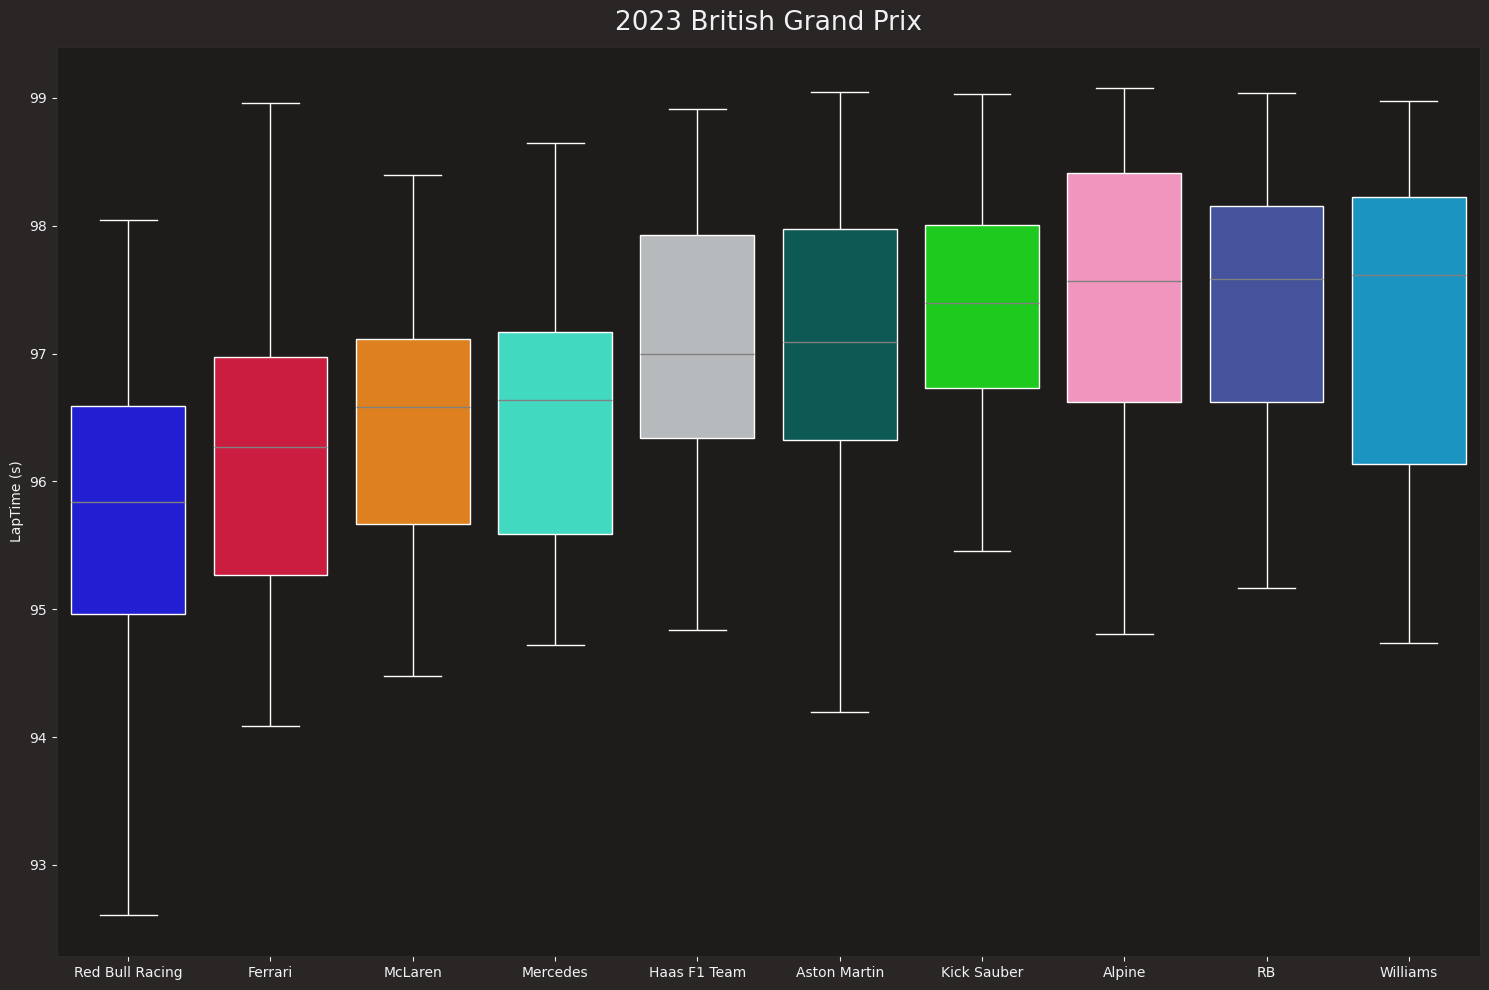

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')
race = fastf1.get_session(2024, 1, 'R')

race.load()
laps = race.laps.pick_quicklaps()
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.get_team_color(team, session=race)
                for team in team_order}
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 British Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()